In [1]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt

FLAGS = None

%matplotlib inline

C:\Users\juan\Miniconda2\envs\brain\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000074E2E80>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000074C6C18>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000074E2FD0>)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


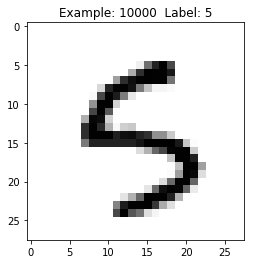

In [3]:
x_train = mnist.train.images[:,:]
y_train = mnist.train.labels[:,:]
    
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    #print(image)
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_digit(10000)

In [4]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

In [6]:
W

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

In [7]:
y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [7]:

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
learning_rate = 0.5

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [8]:
sess = tf.InteractiveSession()

In [9]:
# Train
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

0.9068


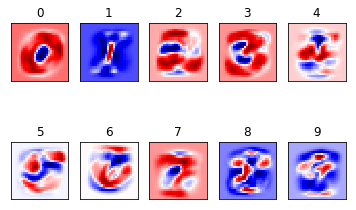

In [11]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

plt.show()

Aplicar el clasificador a un dato

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


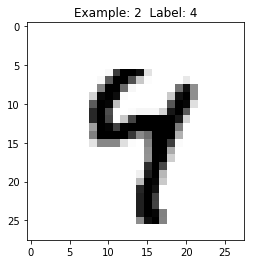

In [14]:
observacion_a_revisar = 2

display_digit(observacion_a_revisar)

In [15]:
answer = sess.run(y, feed_dict={x: x_train[observacion_a_revisar].reshape(1,784)})
print(answer)

[[  2.75826528e-06   3.19850699e-07   3.86720529e-07   5.65896684e-04
    2.22482502e-01   7.87720270e-03   6.11141586e-05   4.09593078e-04
    1.89685207e-02   7.49631703e-01]]


In [16]:
answer.argmax()

9